In [50]:
using ImageFeatures, TestImages, Images, ImageDraw, CoordinateTransformations, Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10102112949703795361\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17595786097201253652\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10102112949703795361\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

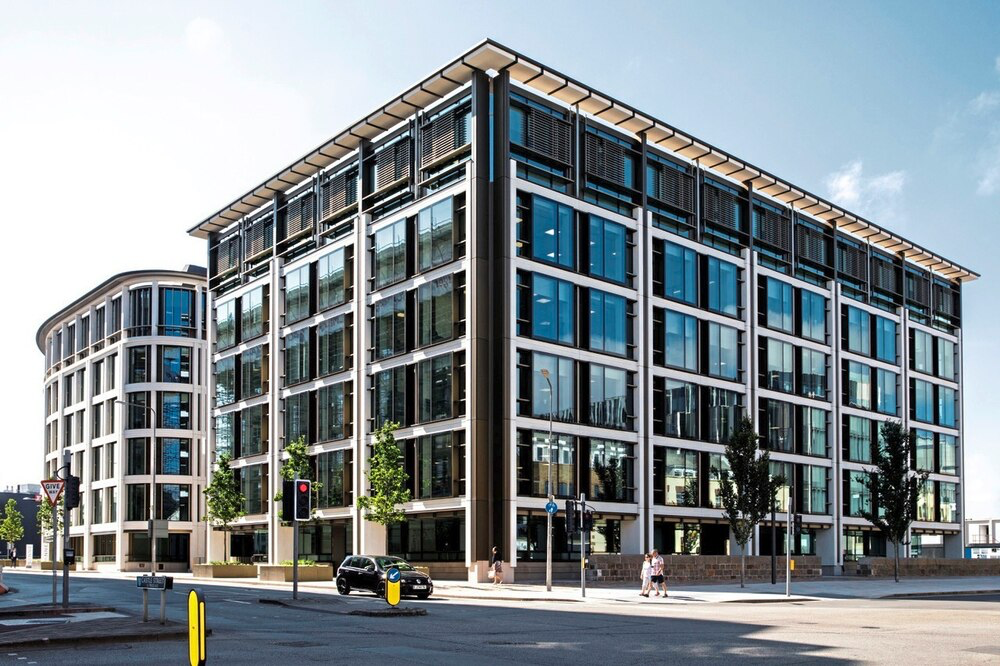

In [4]:
building = load("building.jpg")

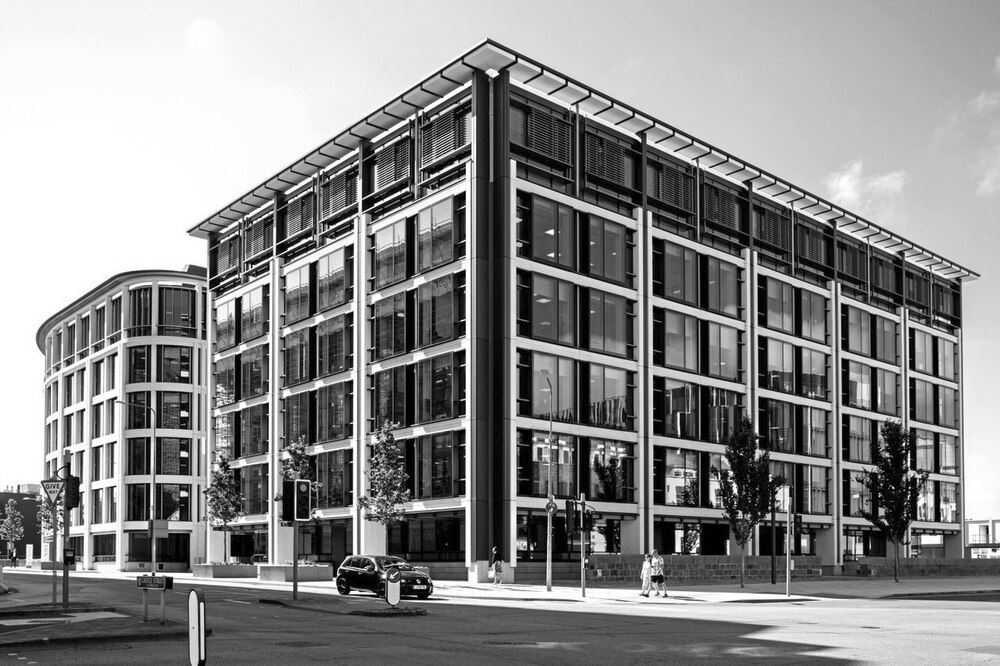

In [5]:
building_gray = Gray.(building)

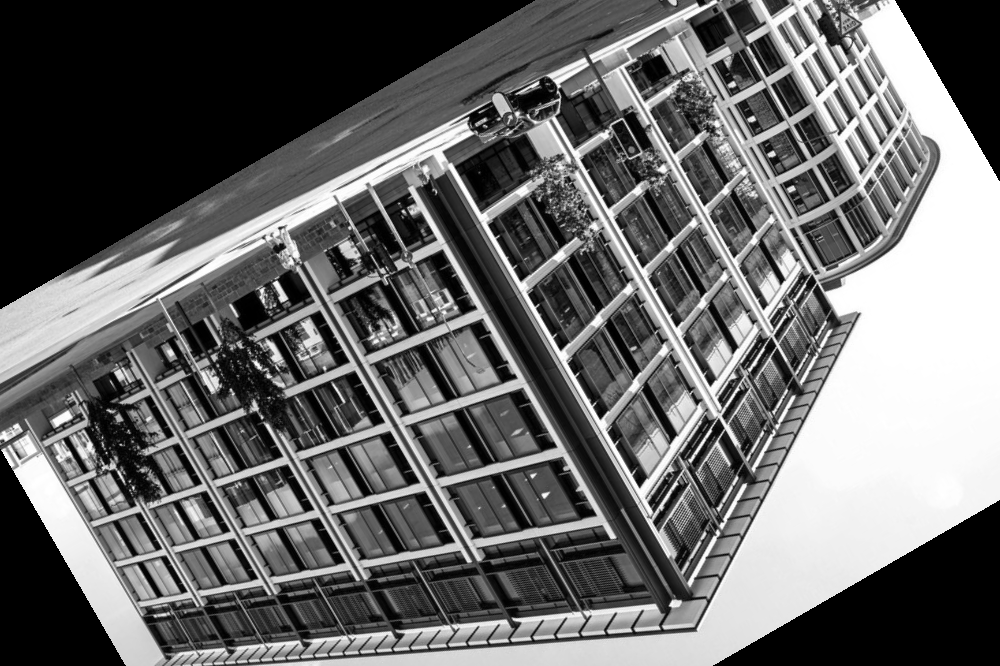

In [6]:
rot = recenter(RotMatrix(5pi/6), [size(building_gray)...] .÷ 2)  # a rotation around the center
tform = rot ∘ Translation(-50, -40)
img = warp(building_gray, tform, axes(building_gray))

In [38]:
features_1 = imcorner(building, method=harris);
features_1 = .!.!features_1

666×1000 BitArray{2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  1  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  1  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

In [8]:
summary(features_1)

"666×1000 BitArray{2}"

In [9]:
# features_1 = Features(fastcorners(building_gray, 12, 0.35))
# features_2 = Features(fastcorners(img, 12, 0.35))

In [10]:
brisk_params = BRISK()

BRISK(0.25, 4, 1.0, Array{Tuple{Float16,Float16},1}[[(0.0, 0.0), (0.0, 2.465), (1.449, 1.994), (2.344, 0.7617), (2.344, -0.7617), (1.449, -1.994), (0.0, -2.465), (-1.449, -1.994), (-2.344, -0.7617), (-2.344, 0.7617)  …  (0.0, -9.18), (-2.836, -8.734), (-5.395, -7.426), (-7.426, -5.395), (-8.734, -2.836), (-9.18, -0.0), (-8.734, 2.836), (-7.426, 5.395), (-5.395, 7.426), (-2.836, 8.734)], [(0.0, 0.0), (0.01512, 2.465), (1.461, 1.985), (2.35, 0.7476), (2.34, -0.776), (1.437, -2.004), (-0.01512, -2.465), (-1.461, -1.985), (-2.35, -0.7476), (-2.34, 0.776)  …  (-0.05634, -9.18), (-2.89, -8.71), (-5.44, -7.395), (-7.46, -5.35), (-8.75, -2.783), (-9.18, 0.05634), (-8.71, 2.89), (-7.395, 5.44), (-5.35, 7.46), (-2.783, 8.75)], [(0.0, 0.0), (0.03024, 2.465), (1.474, 1.977), (2.354, 0.733), (2.334, -0.7905), (1.424, -2.012), (-0.03024, -2.465), (-1.474, -1.977), (-2.354, -0.733), (-2.334, 0.7905)  …  (-0.1127, -9.18), (-2.943, -8.695), (-5.49, -7.36), (-7.492, -5.305), (-8.766, -2.729), (-9.18, 0.

In [11]:
desc_1, ret_features_1 = create_descriptor(building_gray, features_1, brisk_params)
desc_2, ret_features_2 = create_descriptor(building, features_2, brisk_params)

In [12]:
matches = match_keypoints(Keypoints(ret_features_1), Keypoints(ret_features_2), desc_1, desc_2, 0.1)

In [13]:
grid = hcat(building_gray, img)
offset = CartesianIndex(0, size(building_gray, 2))
building_key = map(m -> draw!(grid, LineSegment(m[1], m[2] + offset)), matches)[1]

In [35]:
function draw_points(image::AbstractArray, mask::BitArray{2}; c::Colorant=colorant"red")
    new_image = copy(image);
    new_image[mask] .= c;
    return new_image;
end

draw_points (generic function with 1 method)

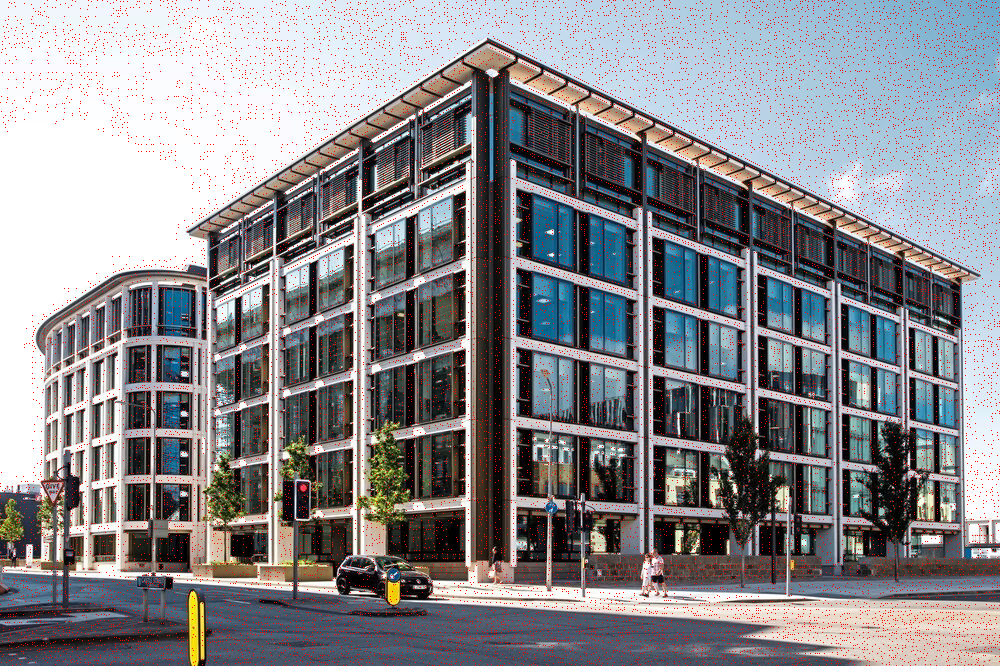

In [36]:
draw_points(building, features_1)

In [41]:
?imcorner

search: imcorner imcorner_subpixel



```
corners = imcorner(img; [method])
corners = imcorner(img, threshold, percentile; [method])
```

Performs corner detection using one of the following methods -

```
1. harris
2. shi_tomasi
3. kitchen_rosenfeld
```

The parameters of the individual methods are described in their documentation. The maxima values of the resultant responses are taken as corners. If a threshold is specified, the values of the responses are thresholded to give the corner pixels. The threshold is assumed to be a percentile value unless `percentile` is set to false.


In [39]:
function draw_points{T,N}(image::AbstractArray{T,N}, mask::BitArray{N}, c::Colorant=colorant"yellow")
    new_image = copy(image);
    new_image[mask] = c;
    return new_image;
end

UndefVarError: UndefVarError: T not defined

In [28]:
function draw_points{T,N}(image::AbstractArray{T,N}, mask::AbstractArray{Bool, N}, c::Colorant=colorant"yellow")
    new_image = copy(image);
    new_image[mask] .= c;
    return new_image;
end

UndefVarError: UndefVarError: T not defined

In [57]:
features3 = imcorner(building, 0.90, true, method=harris)

MethodError: MethodError: no method matching imcorner(::Array{RGBX{Normed{UInt8,8}},2}, ::Float64, ::Bool; method=Images.harris)
Closest candidates are:
  imcorner(::AbstractArray, ::Any; method, args...) at /Users/adrita/.julia/packages/Images/A1qQt/src/corner.jl:28
  imcorner(::AbstractArray; method, args...) at /Users/adrita/.julia/packages/Images/A1qQt/src/corner.jl:19
  imcorner(::AbstractArray, !Matched::Percentile; method, args...) at /Users/adrita/.julia/packages/Images/A1qQt/src/corner.jl:33

In [58]:
draw_points(building, features3);

UndefVarError: UndefVarError: features3 not defined

In [55]:
@manipulate for m=[harris, shi_tomasi, kitchen_rosenfeld]
    draw_points(building, imcorner(building, method=m));
end

MethodError: MethodError: no method matching draw_points(::Array{RGBX{Normed{UInt8,8}},2}, ::Array{Bool,2})
Closest candidates are:
  draw_points(::AbstractArray, !Matched::BitArray{2}; c) at In[35]:2

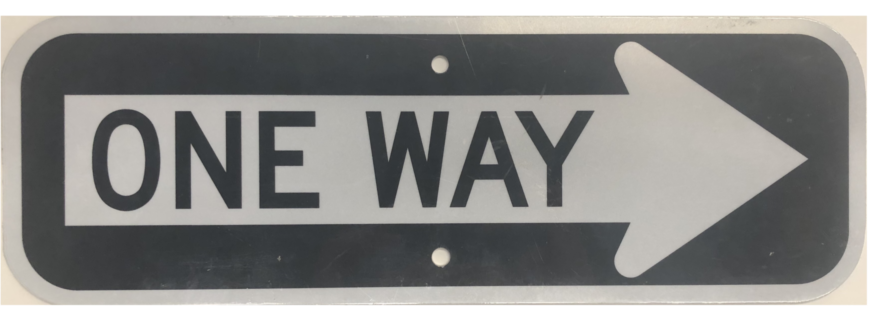

In [60]:
img = load("one_way.png")